# Data Visualization Project Using Python

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
!conda install -c conda-forge folium=0.5.0 --yes
import folium

%matplotlib inline

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

## Part 1: Visualizing Survey Results

In [3]:
# Download and store dataset into dataframe
filepath = 'https://cocl.us/datascience_survey_data'
df_survey = pd.read_csv(filepath, index_col = 0)
df_survey

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

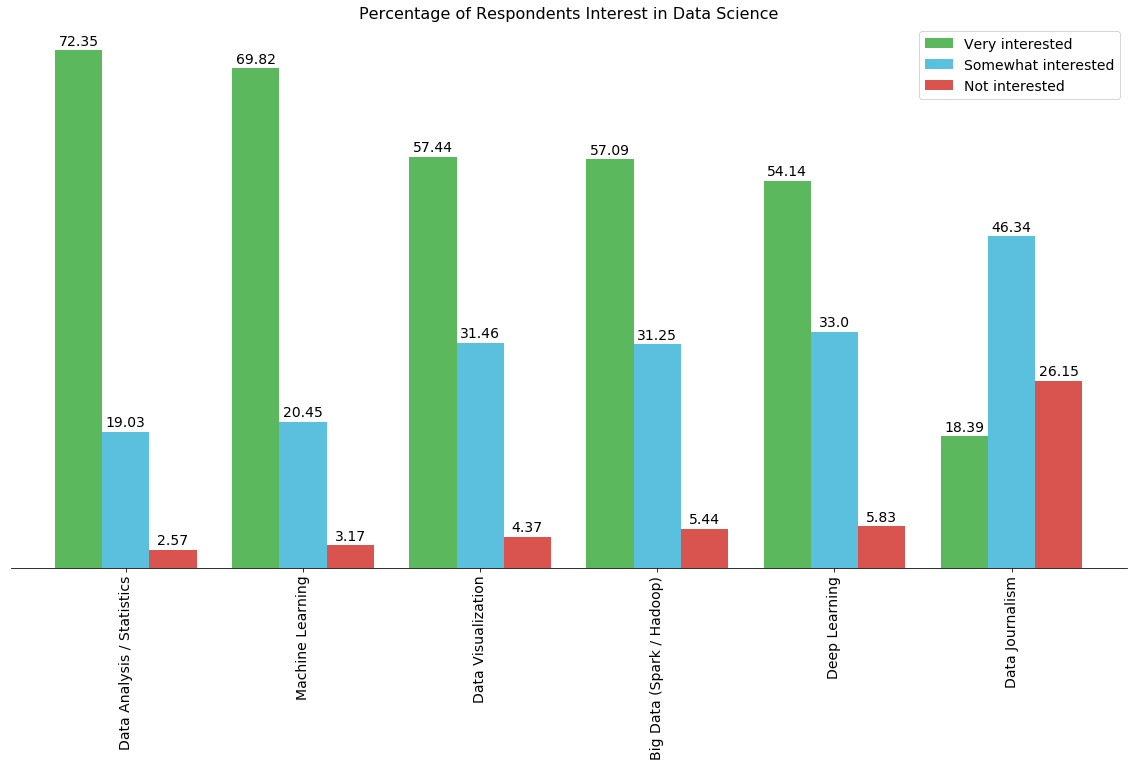

In [4]:
# Create bar chart of the dataset
## Sort the data by 'Very interested'
df_survey.sort_values(by = ['Very interested'], ascending = False, axis = 0, inplace = True)

## Convert numbers to percentages
df_survey_pct = pd.DataFrame()
for col in df_survey.columns: # Each column divided by the total and converted into pecentage
    df_survey_pct[col] = round(df_survey[col] / 2333 * 100, 2)

## Bar Chart
ax = df_survey_pct.plot(kind = 'bar', 
                        figsize = (20, 10),
                        width = 0.8,
                        color = ['#5cb85c', '#5bc0de', '#d9534f'],
                        fontsize = 14,
                        label = 's'
                       )

ax.set_title('Percentage of Respondents'' Interest in Data Science', fontsize = 16)
ax.legend(fontsize = 14)

## Only leave the bottom border and ticks
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(top = False, left = False, right = False)

ax.set_yticks([])

## Label of percentages above the bars
bottom, top = ax.get_ylim() 
height = top - bottom # Get height of the axis

for rect in ax.patches:
    r_width, r_height = rect.get_width(), rect.get_height() # Get width and height of each bar
    value = round(r_height, 2)
    x, y = rect.get_xy() # Get coordinates of each bar
    x_pos = x + r_width / 2 # Set x coordinate of each label
    y_pos = r_height + height * 0.01 # Set y coordinate of each label
    ax.annotate(value, xy = (x_pos, y_pos), fontsize = 14, ha = 'center')

## Part 2: Choropleth Map of Crimes in San Francisco

In [5]:
# Download and store dataset into dataframe
filepath = 'https://cocl.us/sanfran_crime_dataset'
df_sf_crime = pd.read_csv(filepath)
df_sf_crime.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [6]:
# Store each district's crime numbers into a dataframe
df_sf_dist = pd.DataFrame(df_sf_crime['PdDistrict'].value_counts())
df_sf_dist.reset_index(inplace = True)
df_sf_dist.columns = ['Neighborhood', 'Count']
df_sf_dist

Neighborhood  Count
0     SOUTHERN  28445
1     NORTHERN  20100
2      MISSION  19503
3      CENTRAL  17666
4      BAYVIEW  14303
5    INGLESIDE  11594
6      TARAVAL  11325
7   TENDERLOIN   9942
8     RICHMOND   8922
9         PARK   8699

In [7]:
# Download and store geojson file
!wget --quiet https://cocl.us/sanfran_geojson/san-francisco.geojson -O SF.geojson

sf_geo = r'SF.geojson'

In [8]:
# Create a Choropleth map
## Plain map
sf_map = folium.Map(location = [37.7749, -122.4194], zoom_start = 12)

## Choropleth map
sf_map.choropleth(geo_data = sf_geo,
                  data = df_sf_dist,
                  columns = ['Neighborhood', 'Count'],
                  key_on = 'feature.properties.DISTRICT',
                  fill_color = 'YlOrRd',
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = 'Crime Rate in San Francisco'
                 )
sf_map